# Badania kd-tree, ball tree

## 1. Generowanie zestawu danych uczących

Wygeneruj zestawy danych uczących (zawierających dwie klasy):

* kostkę n-wymiarową (2, 3, 4, 6, 8, 10) podzieloną hiperpłaszczyzną:
  - kwadrat podzielony na dwie równe cześci prostą
  - szcześcian podzielony na dwie równe części przez płaszczyznę
  - ...
* szachownica składająca się z 4, 9, 16, 25 kwadratów

Wygenerować różne rozmiary powyższych zbiorów. Dane należy wygenerować w dwóch wersjach: oryginalnej i zaburzone szumem gaussowskim.

Wskazówka: Punkt (a) można zrealizować w postaci jednej funkcji przyjmującej jako parametry wymiarowość przestrzeni, liczbę danych, infomację czy należy do danych dodać szum itp. Dla kostki o długości krawędzi 1 hiperpłaszczyzna musi przechodziz przez punkt $\frac{1}{2}, ..., \frac{1}{2}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_hiperplane(n_dimension):
    """ Generate random hiperplane that goes trough middle point """
    middle_point = np.array([0.5 for _ in range(n_dimension-1)])
    coeffs = np.random.rand(n_dimension-1)
    coeff_0 = 0.5 - np.sum(coeffs * middle_point)
    return coeff_0, coeffs
    
def generate_cube(n_dimension, n_samples, noise=False):
    x = np.random.rand(n_samples, n_dimension)
    return x

In [3]:
n_dimension = 2

samples = generate_cube(n_dimension, 100)
b, coeffs = generate_hiperplane(n_dimension)

labels = np.sum(coeffs * samples[:, 0:-1], axis=1) + b > samples[:, -1]
labels

array([False, False, False,  True,  True,  True,  True, False,  True,
       False, False,  True, False,  True, False,  True,  True, False,
        True, False, False,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True, False, False,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True])

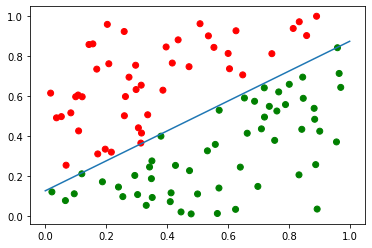

In [4]:
n_dimension = 2

samples = generate_cube(n_dimension, 100)
b, coeffs = generate_hiperplane(n_dimension)

labels = np.sum(coeffs * samples[:, 0:-1], axis=1) + b > samples[:, -1]

x = np.linspace(0,1,100)
y = coeffs[0]*x + b

colors = ['red' if l == 0 else 'green' for l in labels]

plt.plot(x, y)
plt.scatter(samples[:, 0], samples[:, 1], color=colors)
plt.show()

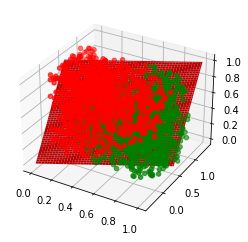

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n_dimension = 3
samples = generate_cube(n_dimension, 2000)
b, coeffs = generate_hiperplane(n_dimension)

labels = np.sum(coeffs * samples[:, 0:-1], axis=1) + b > samples[:, -1]
colors = ['red' if l == 0 else 'green' for l in labels]

xs = np.linspace(0, 1, 100)
zs = np.linspace(0, 1, 100)

X, Z = np.meshgrid(xs, zs)
Y = coeffs[0] * X + coeffs[1] * Z + b

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='r')
ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], color=colors)
plt.show()

0.5 = 0.01247137592305314 * 0.5 + 0.49376431203847343


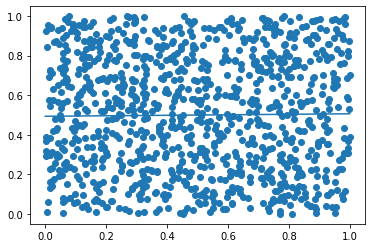

In [6]:
samples = generate_cube(2, 1000)

n_dimension = 2
middle_point = np.array([0.5 for _ in range(n_dimension-1)])

coeffs = np.random.rand(n_dimension-1)
b = 0.5 - np.sum(coeffs * middle_point)
print(f"{0.5} = {coeffs[0]} * 0.5 + {b}")

x = np.linspace(0,1,100)
y = coeffs[0]*x + b

plt.plot(x, y)
plt.scatter(samples[:, 0], samples[:, 1])
plt.show()

[[1041  184]
 [ 133 1142]]
              precision    recall  f1-score   support

         1.0       0.89      0.85      0.87      1225
         2.0       0.86      0.90      0.88      1275

    accuracy                           0.87      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.87      0.87      0.87      2500



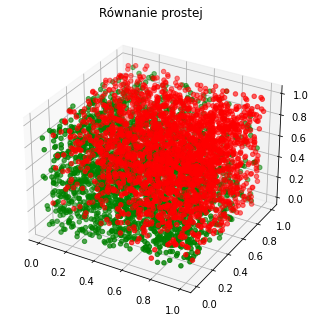

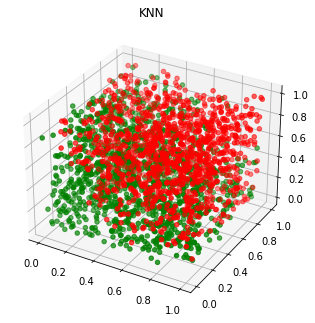

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

def generuj(n, nprob):
    X = np.random.rand(nprob, n)
    return X


n = 4
nprob = 5000
X = generuj(n, nprob)

Y = np.zeros((X.shape[0], 1))

a = np.random.rand(nprob, n - 1)

b = np.ones((nprob, 1))*0.5

for i in range(n - 1):
    b[:,0] -= 0.5 * a[:,i]

Dec = np.zeros((nprob, 1))
for i in range(n - 1):
    Dec[:,0] += a[:,i]*X[:,i]
Dec[:,0] += b[:,0]


Ya = X[:,[X.shape[1] - 1]]
ind1 = np.where(Dec > Ya)

ind2 = np.where(Dec <= Ya)

Y[ind1] = 1
Y[ind2] = 2

dane = np.hstack((X, Y))

X_train, X_test, y_train, y_test = train_test_split(dane[:,0:X.shape[1]], dane[:,[X.shape[1]]], test_size = 0.5)

y_train = y_train.ravel()
y_test = y_test.ravel()

#https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

x1 = [min(X[:,0]), max(X[:,0])]
x2 = [min(X[:,1]), max(X[:,1])]

if (n < 3):
    plt.plot(x1, x2, color = 'black')
    plt.scatter(X[ind1,0], X[ind1,1], color = 'red')
    plt.scatter(X[ind2,0], X[ind2,1], color = 'green')
    plt.title('Równanie prostej')
    plt.show()
else:
    fig = plt.figure()
    ax=Axes3D(fig)
    ax.scatter3D(X[ind1,0], X[ind1,1], X[ind1,2], color = 'red')
    ax.scatter3D(X[ind2,0], X[ind2,1], X[ind2,2], color = 'green')
    plt.title('Równanie prostej')
    plt.show()

x1 = [min(X_test[:,0]), max(X_test[:,0])]
x2 = [min(X_test[:,1]), max(X_test[:,1])]

ind1 = np.where(y_pred == 1)
ind2 = np.where(y_pred == 2)

if (n < 3):
    plt.plot(x1, x2, color = 'black')
    plt.scatter(X_test[ind1,0], X_test[ind1,1], color = 'red')
    plt.scatter(X_test[ind2,0], X_test[ind2,1], color = 'green')
    plt.title('KNN')
    plt.show()
else:
    fig = plt.figure()
    ax=Axes3D(fig)
    ax.scatter3D(X_test[ind1,0], X_test[ind1,1], X_test[ind1,2], color = 'red')
    ax.scatter3D(X_test[ind2,0], X_test[ind2,1], X_test[ind2,2], color = 'green')
    plt.title('KNN')
    plt.show()

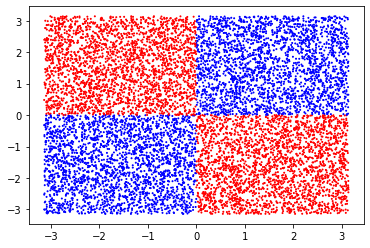

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin

n_points = 10000
n_classes = 2
n = 2

x = np.random.uniform(-(n//2)*np.pi, (n//2)*np.pi, size=(n_points, n_classes))
mask = np.logical_or(np.logical_and(sin(x[:, 0]) > 0.0, sin(x[:, 1]) > 0.0),
                     np.logical_and(sin(x[:, 0]) < 0.0, sin(x[:, 1]) < 0.0))
y = np.eye(n_classes)[1*mask]

plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], s=1, cmap="bwr")
plt.savefig("test.png")
plt.show()

In [9]:
def generate_data(dimension, number_of_points):
    x = np.random.rand(number_of_points, dimension)
    y = np.zeros((x.shape[0], 1))
    data = np.hstack((x, y))
    return data

        

In [10]:
generate_data(2, 10)

array([[5.19174944e-01, 8.39735925e-01, 0.00000000e+00],
       [2.78833689e-01, 9.90067789e-01, 0.00000000e+00],
       [5.46562303e-01, 8.92909785e-01, 0.00000000e+00],
       [5.29278236e-01, 3.66797038e-04, 0.00000000e+00],
       [3.44462918e-01, 6.16425072e-01, 0.00000000e+00],
       [5.46867389e-01, 7.23396334e-02, 0.00000000e+00],
       [1.46609595e-01, 7.71095865e-01, 0.00000000e+00],
       [2.60932342e-01, 1.90512130e-01, 0.00000000e+00],
       [6.31231383e-01, 4.92175456e-01, 0.00000000e+00],
       [9.84339632e-01, 9.29957010e-01, 0.00000000e+00]])

In [11]:
from sklearn.datasets import make_classification
make_classification(n_samples=100, n_features=2, n_classes=2)

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

In [ ]:
from sklearn.datasets import make_checkerboard

In [ ]:
data = make_checkerboard(shape=(500, 2), n_clusters=(100, 100))

In [ ]:
import matplotlib.pyplot as plt
x = data[0][:, 0]
y = data[0][:, 1]
plt.scatter(x, y)

In [ ]:
data[2]

In [ ]:
data[0]